图3  
趋势和波动性

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
import statsmodels.api as sm

In [3]:
import random
from PyEMD import EMD, EEMD
import pwlf

In [15]:
df = pd.read_csv('ex_data/concentration/ch4_incr.csv')[:-1]
obs_data = df['inc']

In [4]:
### EEMD ###

def cal_trend_EEMD(y,index_list=[2]):
    
    # Assign EEMD to `eemd` variable
    eemd = EEMD()

    # Say we want detect extrema using parabolic method
    emd = eemd.EMD
    emd.extrema_detection="parabol"

    S = np.array(y)
    t = np.arange(len(S))

    # Execute EEMD on S
    eIMFs = eemd.eemd(S, t)
    nIMFs = eIMFs.shape[0]

    trend = np.zeros_like(S)
    for i in index_list:
        trend += eIMFs[i]
    trend = trend + (np.mean(y)-np.mean(trend))
    var = S-trend
    return np.array([trend,var])

In [12]:
data = []
for i in range(72):
    text = 'results/ref/'+str(i+1)+'_ref.nc'
    with xr.open_dataset(text) as TMP: 
        TMP = TMP.load()
    data.append(TMP)
sim_data = np.array([x.D_CH4.mean('config').diff('year')[2:] for x in data])

In [13]:
trend_all = []
for i in range(72):
    temp = cal_trend_EEMD(sim_data[i])
    trend_all.append(temp)
trend_all_EEMD = np.array(trend_all)

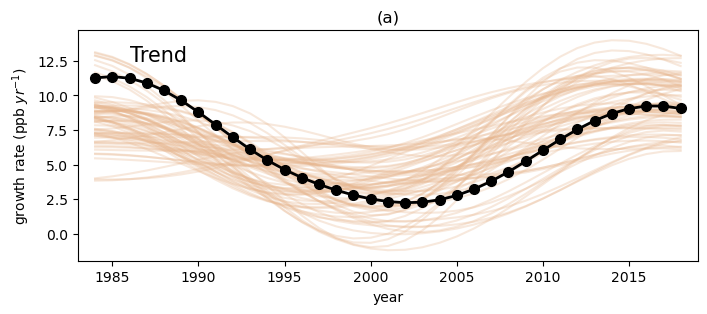

In [41]:
year = np.arange(1984,2018+1)

fig=plt.figure(figsize=(8,3))
ax = plt.subplot2grid((1,1),(0,0),rowspan=1)

for i in range(72):
    temp = trend_all_EEMD[i][0]
    ax.plot(year,temp,color='#e7b58d',alpha=0.3)

temp = cal_trend_EEMD(obs_data)[0]
ax.plot(year,temp,label='Observation',marker='o',color='k',linewidth=2,markersize=7)


ax.plot(0,0,color='grey',alpha=0.3,label='Esemble')
ax.set_xlim(1983,2019)
ax.text(1986,12.5,'Trend ',fontsize=15)
ax.set_title('(a)')
ax.set_ylabel('growth rate (ppb $yr^{-1}$)')
ax.set_xlabel('year')
fig.savefig('figs/Fig.3/Fig.3.a.pdf',dpi=300)

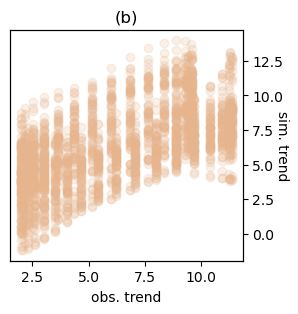

In [39]:
fig=plt.figure(figsize=(3,3))
ax = plt.subplot2grid((1,1),(0,0),rowspan=1)

ax_twinx = ax.twinx()
obs_data_trend = cal_trend_EEMD(obs_data)[0]
for i in range(72):
    ax_twinx.scatter(obs_data_trend,trend_all_EEMD[i][0],color='#e7b58d',alpha=0.2)

ax.set_yticks([])    
ax.set_xlabel('obs. trend')
ax.set_yticks([]) 
ax_twinx.set_ylabel('sim. trend',rotation=-90)
# ax_twinx.set_yticks([-5,0,5,10,15]) 
# ax.set_xticks([-5,0,5,10,15]) 

ax.set_title('(b)')
fig.savefig('figs/Fig.3/Fig3.b.pdf')

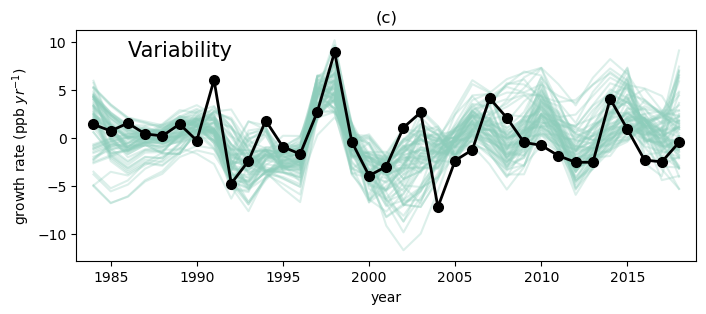

In [26]:
fig=plt.figure(figsize=(8,3))
ax = plt.subplot2grid((1,1),(0,0),rowspan=1)
for i in range(predict.shape[0]):
    temp = trend_all_EEMD[i][1]
    ax.plot(year,temp,color='#8dcdbb',alpha=0.3)
ax.plot(0,0,color='grey',alpha=0.3,label='simulations')
temp = cal_trend_EEMD(obs_data)[1]
ax.plot(year,temp,label='Observation',marker='o',color='k',linewidth=2,markersize=7)

ax.set_xlim(1983,2019)
ax.text(1986,8.5,'Variability ',fontsize=15)
# ax.legend()
ax.set_ylabel('growth rate (ppb $yr^{-1}$)')
ax.set_xlabel('year')
ax.set_title('(c)')
# ax.legend()
fig.savefig('figs/Fig.3/Fig.3.c.pdf',dpi=300)

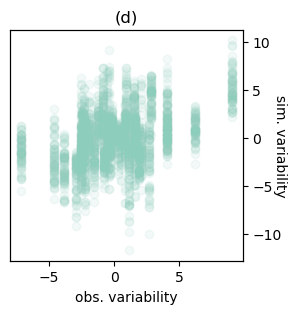

In [40]:
fig=plt.figure(figsize=(3,3))
ax = plt.subplot2grid((1,1),(0,0),rowspan=1)

ax_twinx = ax.twinx()
obs_data_var = cal_trend_EEMD(obs_data)[1]
for i in range(72):
    ax_twinx.scatter(obs_data_var,trend_all_EEMD[i][1],color='#8dcdbb',alpha=0.1)
ax.set_yticks([])    
ax.set_xlabel('obs. variability')
ax.set_yticks([]) 
ax_twinx.set_ylabel('sim. variability',rotation=-90)
# ax_twinx.set_yticks([-10,-5,0,5,10]) 
# ax.set_xticks([-10,-5,0,5,10]) 

ax.set_title('(d)')
fig.savefig('figs/Fig.3/Fig3.d.pdf')

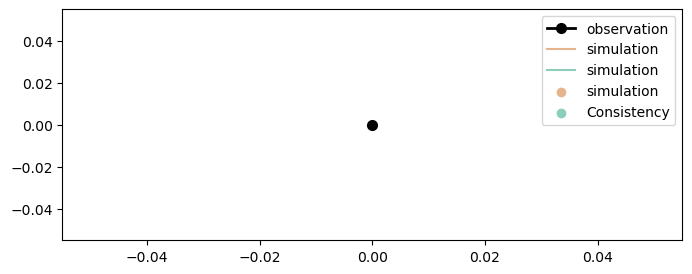

In [57]:
fig=plt.figure(figsize=(8,3))
ax = plt.subplot2grid((1,1),(0,0),rowspan=1)
ax.plot(0,0,marker='o',color='k',linewidth=2,markersize=7,label='observation')
ax.plot(0,0,color='#e7b58d',alpha=1,label='simulation')
ax.plot(0,0,color='#8dcdbb',alpha=1,label='simulation')
ax.scatter(0,0,color='#e7b58d',label='simulation')
ax.scatter(0,0,color='#8dcdbb',label='Consistency')
ax.legend()
fig.savefig('figs/Fig.3/Fig.3.legend.pdf',dpi=300)